In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("titanic.csv", sep='\t')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


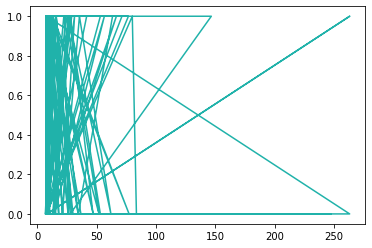

In [31]:
# just show 'Fare' and 'Survived' raw relationship
plt.plot( df['Fare'].tolist(), df['Survived'].tolist(), color = 'LightSeaGreen')

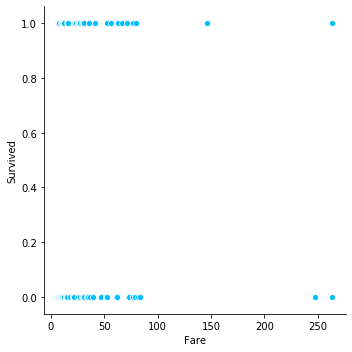

In [28]:
#sort the dataframe by 'Fare' in ascending order
sorted_df = df.sort_values('Fare', ascending = True)
sns.relplot(x = 'Fare', y = 'Survived', data = sorted_df, color = 'DeepSkyBlue')
#as we can see, in Fare between [0, 100], the Survived rate seem like half half,
#Fare after 100, we need more data, no result show oud

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

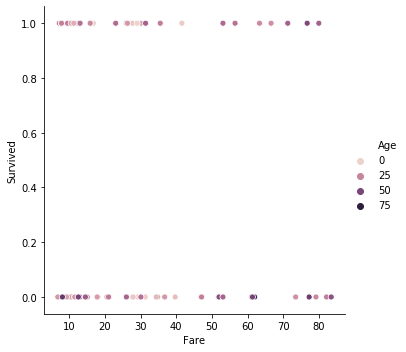

In [9]:
#Now we just look at Fare between[0, 100]
less_hundred_df = df.loc[sorted_df['Fare'] < 100]
#Add age to this relplot to see if this can affect survived result
sns.relplot(x = 'Fare', y = 'Survived', hue = 'Age', data = less_hundred_df)

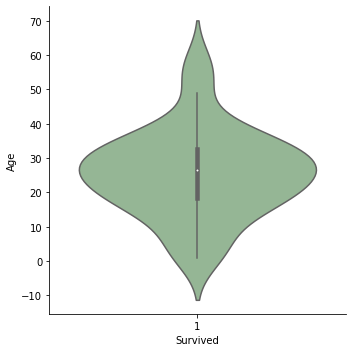

In [27]:
#Now lets campare the ages of survived people and dead people
#survived people
age_hundred_survived = less_hundred_df[['Age', 'Survived']].sort_values('Age', ascending = True)
age_hundred_survived = age_hundred_survived[age_hundred_survived['Survived'] == 1]
sns.catplot(x = 'Survived', y = 'Age', data = age_hundred_survived, kind = 'violin', color = 'DarkSeaGreen')

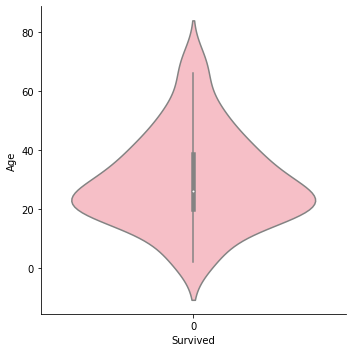

In [30]:
#Now look at dead people
age_hundred_dead = less_hundred_df[['Age', 'Survived']].sort_values('Age', ascending = True)
age_hundred_dead = age_hundred_dead[age_hundred_dead['Survived'] == 0]
sns.catplot(x = 'Survived', y = 'Age', data = age_hundred_dead, kind = 'violin', color = 'LightPink')
#We can see age do not affact the Survived rate

In [16]:
age_hundred_dead['Survived'] == 0

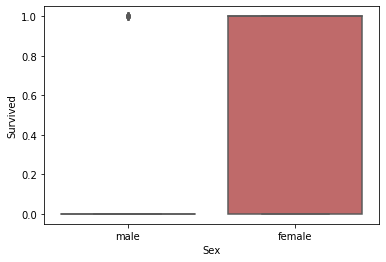

In [29]:
#Now we look at Sex
sex_hundred = less_hundred_df[['Sex', 'Survived']]
sns.boxplot(x = 'Sex', y = 'Survived', data = sex_hundred, color = 'IndianRed')